In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
menu_df = pd.read_csv('mcdonalds_menu.csv')
menu_df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
# Check for null values
menu_df.isna().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [4]:
# Check our features
menu_df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [5]:
# Some statiscial information on our features
menu_df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [6]:
menu_df = menu_df[['Item', 'Calories', 'Total Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein']]
menu_df


,Item,Calories,Total Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
0,Egg McMuffin,300,13.0,260,750,31,4,3,17
1,Egg White Delight,250,8.0,25,770,30,4,3,18
2,Sausage McMuffin,370,23.0,45,780,29,4,2,14
3,Sausage McMuffin with Egg,450,28.0,285,860,30,4,2,21
4,Sausage McMuffin with Egg Whites,400,23.0,50,880,30,4,2,21
...,...,...,...,...,...,...,...,...,...
255,McFlurry with Oreo Cookies (Small),510,17.0,45,280,80,1,64,12
256,McFlurry with Oreo Cookies (Medium),690,23.0,55,380,106,1,85,15
257,McFlurry with Oreo Cookies (Snack),340,11.0,30,190,53,1,43,8
258,McFlurry with Reese's Peanut Butter Cups (Medium),810,32.0,60,400,114,2,103,21


In [7]:
menu_df[menu_df['Calories'] == 0]


,Item,Calories,Total Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
114,Diet Coke (Small),0,0.0,0,10,0,0,0,0
115,Diet Coke (Medium),0,0.0,0,20,0,0,0,0
116,Diet Coke (Large),0,0.0,0,35,0,0,0,0
117,Diet Coke (Child),0,0.0,0,15,0,0,0,0
122,Diet Dr Pepper (Small),0,0.0,0,70,0,0,0,2
123,Diet Dr Pepper (Medium),0,0.0,0,100,0,0,0,3
124,Diet Dr Pepper (Large),0,0.0,0,140,0,0,0,4
125,Diet Dr Pepper (Child),0,0.0,0,50,0,0,0,1
136,Dasani Water Bottle,0,0.0,0,0,0,0,0,0
137,Iced Tea (Small),0,0.0,0,10,0,0,0,0


In [8]:
# sns.pairplot(menu_df)


In [9]:
# Let's do Feature Scaling
standard_scaler = StandardScaler() # Z-score normalization

menu_df_scaled = menu_df.copy()
# Ignore Item columns as it is not numerical
menu_df_scaled[menu_df_scaled.columns[1:]] = standard_scaler.fit_transform(menu_df[menu_df.columns[1:]])

menu_df_scaled.describe()

,Calories,Total Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
count,260.000000,2.600000e+02,2.600000e+02,260.000000,2.600000e+02,2.600000e+02,260.000000,2.600000e+02
mean,0.000000,-2.732857e-17,-2.732857e-17,0.000000,-2.732857e-17,-2.732857e-17,0.000000,-2.732857e-17
std,1.001929,1.001929e+00,1.001929e+00,1.001929,1.001929e+00,1.001929e+00,1.001929,1.001929e+00
min,-1.535688,-9.990642e-01,-6.307865e-01,-0.860803,-1.679070e+00,-1.042225e+00,-1.027895,-1.169615e+00
25%,-0.659985,-8.315589e-01,-5.733821e-01,-0.674144,-6.151588e-01,-1.042225e+00,-0.827019,-8.188651e-01
50%,-0.117883,-2.232500e-01,-2.289554e-01,-0.530894,-1.186670e-01,-4.031249e-01,-0.416533,-1.173662e-01
75%,0.549319,5.701963e-01,1.154712e-01,0.641153,4.487522e-01,8.750760e-01,0.648985,4.964454e-01
max,6.303938,7.323306e+00,5.970725e+00,5.390113,3.321312e+00,3.431478e+00,3.443785,6.459186e+00


# Model training and evaluation

In [12]:
# To get reproducible outputs
random_seed = 123

### START CODE HERE ###
X = menu_df.drop(columns=['Calories', 'Item'])
Y = menu_df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8)
### END CODE HERE ###

In [13]:
print('Train Test percentages:', len(X_train)/len(X)*100, 100-len(X_train)/len(X)*100 )


Train Test percentages: 80.0 20.0


In [14]:
X_train.head()


,Total Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
170,0.0,5,135,51,1,48,12
120,0.0,0,90,72,0,70,0
242,19.0,75,200,109,0,81,14
159,14.0,40,190,60,1,56,15
211,11.0,35,125,41,1,34,8


In [15]:
y_train.head()


170    250
120    270
242    660
159    420
211    290
Name: Calories, dtype: int64

In [23]:
### START CODE HERE ###
# Create linear regression object
regr = LinearRegression()
  


# Train the model using the training sets
regr = regr.fit(X, Y)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Calculate mean squared error
cost = mean_squared_error(y_test, y_pred)

# Calculate accuracy using r2_score
acc = r2_score(y_test, y_pred)
### END CODE HERE ###
     

In [24]:
# The coefficients
print('Model Coefficients (w\'s): \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.5f' % cost)
# Accuracy
print('Model Accuracy: %.2f' % acc)

Model Coefficients (w's): 
 [ 9.02139106e+00 -5.46470933e-03 -4.93940685e-03  4.10833195e+00
 -1.68024811e-01 -1.46722911e-01  4.11875880e+00]
Mean squared error: 22.70050
Model Accuracy: 1.00


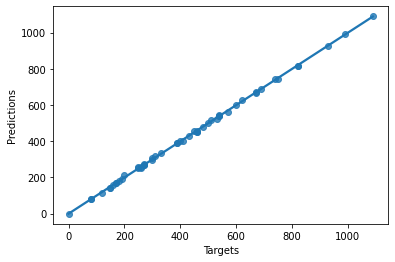

In [25]:

ax = sns.regplot(x=y_test,y=y_pred,ci=None)
ax.set(xlabel='Targets', ylabel='Predictions')
plt.show()

In [26]:
whopper = pd.DataFrame(data=[[39, 95, 1217, 49, 3, 14, 29]], columns=['Total Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein'])
whopper

,Total Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein
0,39,95,1217,49,3,14,29


In [27]:
regr.predict(whopper)


array([661.86405956])